In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [35]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
df = df.iloc[:,1:]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [37]:
df.shape

(400, 4)

In [38]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [40]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [41]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == "Male" else 0)

In [42]:
df["Gender"].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [43]:
df.dalgoescribe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


# EDA

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

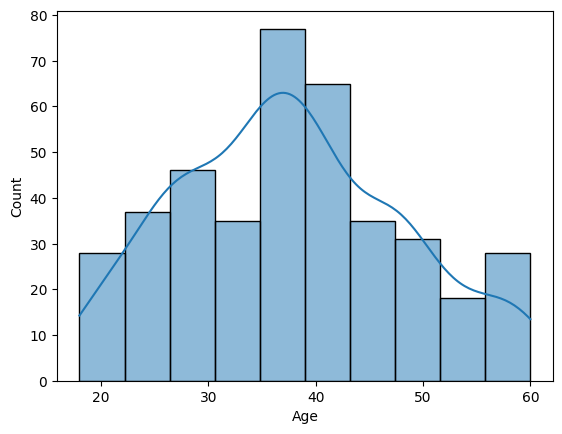

In [48]:
sns.histplot(data = df, x = "Age",kde= True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

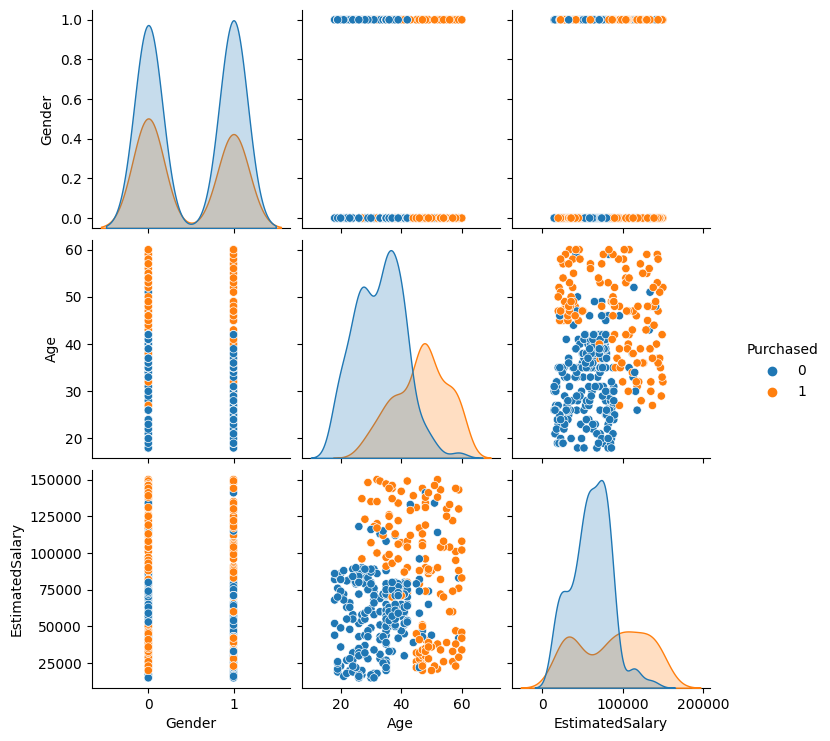

In [49]:
sns.pairplot(data = df , hue = "Purchased")

## Modeling

In [50]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [51]:
X = df.iloc[:,:-1]
y = df.Purchased

In [73]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [54]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

In [75]:
X_train.shape

(320, 3)

In [76]:
X_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,320.000000,320.000000
mean,0.512500,37.846875,69350.000000
std,0.500627,10.810638,34061.202522
min,0.000000,18.000000,15000.000000
25%,0.000000,29.000000,42750.000000
50%,1.000000,37.000000,70000.000000
75%,1.000000,46.000000,88000.000000
max,1.000000,60.000000,150000.000000


In [78]:
X_test.describe()

,Gender,Age,EstimatedSalary
count,80.000000,80.000000,80.00000
mean,0.400000,36.887500,71312.50000
std,0.492989,9.074925,34409.88736
min,0.000000,19.000000,17000.00000
25%,0.000000,30.750000,47750.00000
50%,0.000000,36.000000,67500.00000
75%,1.000000,42.000000,86500.00000
max,1.000000,59.000000,150000.00000


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [87]:
X_train[0]

array([-1.02532046, -1.56080149, -1.56875129])

In [88]:
y_train

32     0
215    1
281    0
131    0
252    1
      ..
393    1
246    0
176    0
170    0
343    1
Name: Purchased, Length: 320, dtype: int64

In [104]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9125

## Choosing best K by cross-validation

In [106]:
scores = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

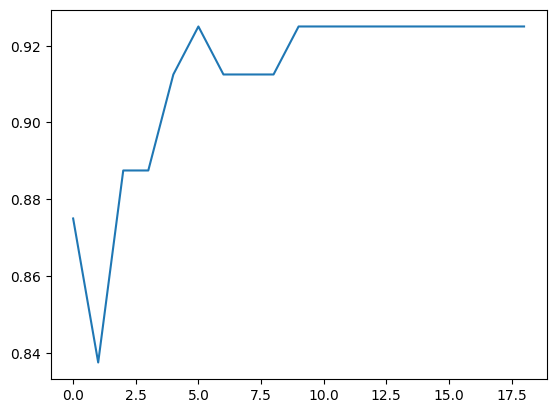

In [107]:
plt.plot(scores)
plt.show()